## RR1 Dynamic Persistance Comparisons

### Load Models

In [1]:
from gensim.matutils import kullback_leibler
from gensim.matutils import jensen_shannon

In [2]:
import numpy as np
import spacy
import gensim
import csv
import pandas as pd

In [3]:
from gensim.models import LdaSeqModel
from gensim.corpora import Dictionary

In [4]:
import matplotlib.pyplot as plt

In [25]:
ldaseq_fast = LdaSeqModel.load("ldaseq_rev_fast_32_14periods_CV001")

### Create Topic List


Format of this file?

In [9]:
# change here to include all time periods in a single file
def topics_to_csv(model, name_file, times=16):
    with open(name_file, 'w', newline='') as csvfile:
        spamwriter = csv.writer(csvfile)
        for time in range(0, times):
            spamwriter.writerow(["Topic Number for time period " + str(time) , "Word, Probability"])
            topics = model.print_topics(time=time)
            for num, topic in enumerate(topics):
                topic.insert(0, num)
                spamwriter.writerow(topic)

In [10]:
topics_to_csv(ldaseq_fast, "new_models/results/ldaseq_rev_fast_32_16periods_CV01_topics.csv")

### Top Words from Model

In [26]:
topics = ldaseq_fast.print_topics(time=0)

In [27]:
topics[21]

[('wohn', 0.01007818831635055),
 ('wohnung', 0.009844739296711948),
 ('miet', 0.008109225241486714),
 ('foerder', 0.007277510955062678),
 ('gefoerdert', 0.007011413254205991),
 ('antraeg', 0.006634222622812441),
 ('wohnbau', 0.006261152361182272),
 ('hoeh', 0.005985274616481295),
 ('wohnbaufoerder', 0.0057554996874703435),
 ('rahm', 0.005722612162730612),
 ('stadterneuer', 0.0052249960010912755),
 ('betrag', 0.004356961627337897),
 ('stadt', 0.004165595307151521),
 ('darleh', 0.004135305954412866),
 ('landesregier', 0.004102940758976827),
 ('rund', 0.004086241102935389),
 ('wwfsg', 0.0040046062504644426),
 ('wohnhaussanierungsgesetz', 0.0037406404783550304),
 ('wohnhaus', 0.0037332566881085843),
 ('vergeb', 0.003727889451663601)]

In [29]:
def top_words_topic(model, time, topic_num): 
    topics = model.print_topics(time=time)
    top_words = []
    for word, prob in topics[topic_num]:
        top_words.append(word)
    return top_words

In [36]:
top_words_housing = []

In [37]:
for i in range(0, 14):
    top_words_housing.append(top_words_topic(ldaseq_fast, i, 21))

In [38]:
top_words_housing

[['wohn',
  'wohnung',
  'miet',
  'foerder',
  'gefoerdert',
  'antraeg',
  'wohnbau',
  'hoeh',
  'wohnbaufoerder',
  'rahm',
  'stadterneuer',
  'betrag',
  'stadt',
  'darleh',
  'landesregier',
  'rund',
  'wwfsg',
  'wohnhaussanierungsgesetz',
  'wohnhaus',
  'vergeb'],
 ['wohnung',
  'wohnbaufoerder',
  'foerder',
  'antraeg',
  'miet',
  'hoeh',
  'rahm',
  'darleh',
  'wohnhaussanierungsgesetz',
  'gefoerdert',
  'rund',
  'wohnhaus',
  'wohnbau',
  'betrag',
  'abteil',
  'vergeb',
  'wwfsg',
  'stadt',
  'erricht',
  'gesamtbetrag'],
 ['miet',
  'wohnung',
  'wohnbaufoerder',
  'wohnhaus',
  'antraeg',
  'foerder',
  'wohnbaufoerderungsgesetz',
  'hoeh',
  'darleh',
  'rahm',
  'rund',
  'prozent',
  'stadt',
  'schilling',
  'abteil',
  'wohnhaussanierungsgesetz',
  'million',
  'mietrechtsgesetz',
  'betrag',
  'wohnbau'],
 ['wohnung',
  'miet',
  'wohnhaus',
  'wohnbaufoerder',
  'antraeg',
  'wohnbaufoerderungsgesetz',
  'darleh',
  'wohn',
  'hoeh',
  'wohnungsverbesser

In [39]:
import csv

In [40]:
with open("topwords.csv", "w", newline="") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(top_words_housing)

### Tracking Change

In [16]:
import operator

In [17]:
# change here to track prevalance. since there are so many words, the word change probabilities are not super useful... yet.
# should chat about this when we meet next
def tracking_change_prevalance(topic_model, topic_num, first_time_period=0, second_time_period=4):
    
    topics_begin = topic_model.print_topics(time=first_time_period)[topic_num]
    topics_end = topic_model.print_topics(time=second_time_period)[topic_num]
    
    word_prevalance_begin = {}
    word_prevalance_end = {}
    word_change = {}
    words_begin, words_end = [], []
    all_probs = []
    
    for num, word_prob in enumerate(topics_begin):
        word, prob = word_prob
        word_prevalance_begin[word] = prob
        words_begin.append(word)
        all_probs.append(prob)
        
    for num, word_prob in enumerate(topics_end):
        word, prob = word_prob
        word_prevalance_end[word] = prob
        words_end.append(word)
        all_probs.append(prob)
    
    min_prob = min(all_probs)
    
    for word in words_begin:
        if word not in word_prevalance_end:
            word_prevalance_end[word] = min_prob
    
    for word in words_end:
        if word not in word_prevalance_begin:
            word_prevalance_begin[word] = min_prob
    
    all_words = list(set(words_begin) | set(words_end)) 
    
    for word in all_words:
        word_change[word] = word_prevalance_end[word] - word_prevalance_begin[word]

    
    sorted_word_change = sorted(word_change.items(), key=operator.itemgetter(1))
    
    sorted_word_change.reverse()
    
    return sorted_word_change
                                                                    

In [18]:
tracking_change_prevalance(ldaseq_fast, 25, 8, 10)

[('nament', 0.07543477933442991),
 ('insofern', 0.04853408941145259),
 ('finanzministerium', 0.028956825481869324),
 ('fabrik', 0.02725162045945325),
 ('stadtbahn', 0.01533918464407568),
 ('parzell', 0.013882961933167879),
 ('zufall', 0.011442287675104868),
 ('landesverteid', 0.008189420694458913),
 ('pflichtig', 0.004044038895387433),
 ('handhab', 0.003411341872894105),
 ('baupolizei', 0.002095594614243323),
 ('unbesetzt', 0.0003567628672135224),
 ('zuzieh', 0.00017647657333453876),
 ('laxenburgerstrass', 1.87361675906628e-05),
 ('revidiert', 0.0),
 ('behoerd', -0.00022466904693413392),
 ('verwaltung', -0.00046075076551694433),
 ('aufzueg', -0.0006074598476189354),
 ('schlag', -0.0007336769176765831),
 ('organisationsplan', -0.0014327603185773996),
 ('technisch', -0.002621501404830767),
 ('kinos', -0.00277798021199802),
 ('konzession', -0.0031883172790563062),
 ('fremdenverkehr', -0.004426247619926534),
 ('pruefung', -0.00493375945645993),
 ('bas', -0.00864058049580747),
 ('baustoff',

In [20]:
tracking_change_prevalance(ldaseq_fast, 29, 8, 10)

[('magistratsabteil', 0.005655560748456205),
 ('bezirksamt', 0.0047261879986440014),
 ('zugewies', 0.003342947273282204),
 ('gewerb', 0.0032787931220061494),
 ('einzeln', 0.0027822787915269707),
 ('zahl', 0.0027452633988132207),
 ('buergermeist', 0.0023523664256931602),
 ('gegenossenschaft', 0.0018952675646246161),
 ('agend', 0.0010208463272058021),
 ('stell', 0.0006726582745729829),
 ('arbeit', 0.0002879631482826002),
 ('mitglied', 0.00027903451988277404),
 ('geschaeftsfuehr', 0.0002642752132194764),
 ('amtshandl', 0.00019685754364383995),
 ('amt', 0.00011810492015527051),
 ('geschaeftsstueck', 0.0),
 ('einfach', -0.0008464326048429095),
 ('mittl', -0.0008696314942956722),
 ('personal', -0.0011800525431957419),
 ('geschaeft', -0.0013698908453632997),
 ('leit', -0.0014786534214231185),
 ('hauptabteil', -0.0017302420572822838),
 ('grupp', -0.001958940511218768),
 ('angestellt', -0.002281310271770167),
 ('geschaeftseinteil', -0.0027820060969025078),
 ('personalstand', -0.0028064048591627

In [21]:
def tracking_change(topic_model, topic_num, first_time_period=0, second_time_period=4):
    
    topics_begin = topic_model.print_topics(time=first_time_period)[topic_num]
    topics_end = topic_model.print_topics(time=second_time_period)[topic_num]
    
    word_ranks_begin = {}
    word_ranks_end = {}
    word_change = {}
    words_begin, words_end = [], []
    
    for num, word_prob in enumerate(topics_begin):
        word, prob = word_prob
        word_ranks_begin[word] = num
        words_begin.append(word)
            
    for num, word_prob in enumerate(topics_end):
        word, prob = word_prob
        word_ranks_end[word] = num
        words_end.append(word)

    for word in words_begin:
        if word not in word_ranks_end:
            word_ranks_end[word] = 21
    
    for word in words_end:
        if word not in word_ranks_begin:
            word_ranks_begin[word] = 21
    
    all_words = list(set(words_begin) | set(words_end)) 
    
    for word in all_words:
        word_change[word] = word_ranks_begin[word] - word_ranks_end[word]

    
    sorted_word_change = sorted(word_change.items(), key=operator.itemgetter(1))
    
    sorted_word_change.reverse()
    
    return sorted_word_change
                              

In [24]:
tracking_change(ldaseq_fast, 29, 8, 10)

[('magistratsabteil', 21),
 ('bezirksamt', 20),
 ('zugewies', 18),
 ('gewerb', 17),
 ('einzeln', 14),
 ('zahl', 13),
 ('gegenossenschaft', 12),
 ('buergermeist', 11),
 ('agend', 10),
 ('arbeit', 9),
 ('stell', 7),
 ('mitglied', 5),
 ('geschaeftsfuehr', 4),
 ('amtshandl', 3),
 ('geschaeftsstueck', 2),
 ('amt', 2),
 ('geschaeft', -2),
 ('einfach', -3),
 ('mittl', -4),
 ('personal', -5),
 ('leit', -6),
 ('abteil', -6),
 ('angeleg', -7),
 ('hauptabteil', -7),
 ('grupp', -9),
 ('angestellt', -11),
 ('geschaeftseinteil', -12),
 ('personalstand', -13),
 ('beamt', -13),
 ('dienststell', -15),
 ('dien', -17),
 ('aufgab', -18),
 ('verwalt', -20)]

### KL Distances by period

Topic changes over time?

TODO - save matrix to CSV

In [11]:
def parse_topic_string(topics, model):
    # takes the string returned by model.show_topics()
    # split on strings to get topics and the probabilities
    # list to store topic bows
    topics_bow = []
    for topic in topics:
        topic_bow = []
        for prob_word in topic:
            # split probability and word
            word, prob = prob_word
            # convert to word_type
            word = model.id2word.doc2bow([word])[0][0]
            topic_bow.append((word, float(prob)))
        topics_bow.append(topic_bow)
    return topics_bow

In [12]:
import numpy as np

In [13]:
def entropy_changes_time(topics_time):
    changes = []
    for i in range(0, len(topics_time) - 1):
        changes.append(kullback_leibler(topics_time[i], topics_time[i + 1]))
    return changes

In [14]:
topics_changes_time = {}
for i in range(0, 32):
    topics_time = ldaseq_fast.print_topic_times(i, top_terms=len(ldaseq_fast.id2word))
    topics_time = parse_topic_string(topics_time, ldaseq_fast)
    topics_changes_time[i] = entropy_changes_time(topics_time)

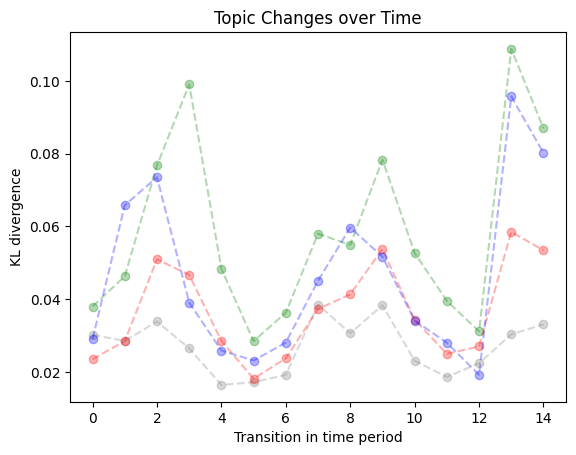

In [16]:
plt.plot(range(0, 15), topics_changes_time[14], 'o--', color='grey', alpha=0.3)
plt.plot(range(0, 15), topics_changes_time[0], 'o--', color='green', alpha=0.3)
plt.plot(range(0, 15), topics_changes_time[21], 'o--', color='red', alpha=0.3)
plt.plot(range(0, 15), topics_changes_time[5], 'o--', color='blue', alpha=0.3)
plt.title("Topic Changes over Time")
plt.xlabel("Transition in time period")
plt.ylabel("KL divergence")
plt.show()

In [17]:
import pandas as pd

In [18]:
pd.DataFrame.from_dict(topics_changes_time).T.to_csv("new_models/results/ldaseq_rev_fast_32_16periods_CV01_KL_time.csv")

### Coherence Value for DTM

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
topics_dtm = ldaseq_fast.dtm_coherence(time=2)

In [ ]:
cm_DTM = CoherenceModel(topics=topics_dtm, corpus=corpus, dictionary=dictionary, coherence='u_mass')

In [ ]:
print ("DTM Python coherence is", cm_DTM.get_coherence())